In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pathlib
import cv2
import matplotlib.pyplot as plt

In [2]:
data_dir = pathlib.Path('../../raw_images/raw_class_images')
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Total images', image_count)

Total images 1725


Image Shape (M, N, 3):  (3072, 4608, 3)


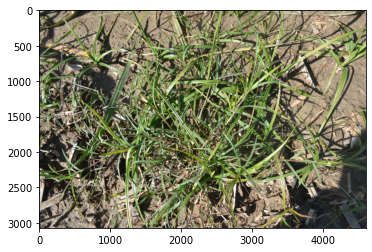

In [80]:
weeds = list(data_dir.glob('weeds/*'))
img_bgr = cv2.imread(str(weeds[5]))
img = img_bgr[:,:,::-1]  # BGR to RGBplt.imshow(img)
M,N,_ = img.shape
print("Image Shape (M, N, 3): ", img.shape)

plt.imshow(img)

In [67]:
# Set tile size to be Mt x Nt
# Should divide M,N evenly
Mt = 512
Nt = 512

rows = M//Ms
cols = N//Ns

tiles = [img[x:x+Mt,y:y+Nt] for x in range(0,img.shape[0],Mt) for y in range(0,img.shape[1],Nt)]
print("Number of tiles: ", len(tiles))

Number of tiles:  54


In [69]:
# Rescale each tile to be the desired image size for the CNN
# CNN takes in (Md x Nd) image
Md = 224
Nd = 224

dim_nn = (Md, Nd)
tiles_resized = [cv2.resize(tile, dim_nn, interpolation = cv2.INTER_AREA) for tile in tiles]

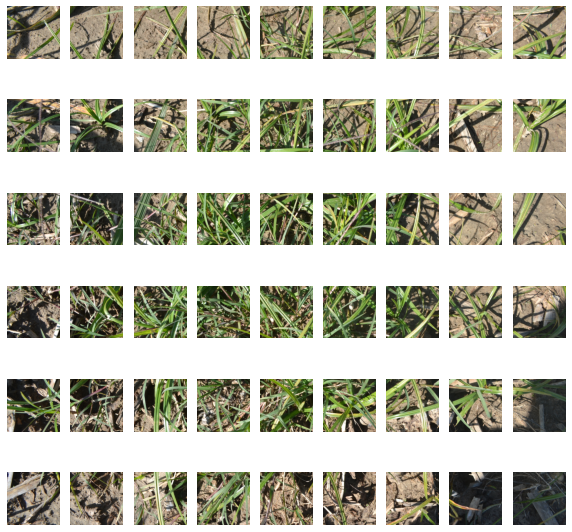

In [70]:
plt.figure(figsize=(10, 10))
for i in range(len(tiles)):
    ax = plt.subplot(rows, cols, i + 1)
    plt.imshow(tiles_resized[i])
    plt.axis("off")

### Put tiles back together

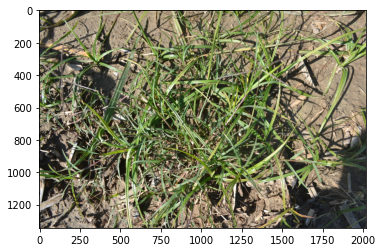

In [97]:
reconstruct = np.zeros((Md*rows,Nd*cols,3), dtype=int)
idx = 0
for r in range(rows):
    for c in range(cols):
        x = r * Md
        y = c * Nd
        reconstruct[x:x+Md,y:y+Nd] = tiles_resized[idx]
        idx += 1
        
plt.imshow(reconstruct)            
    
